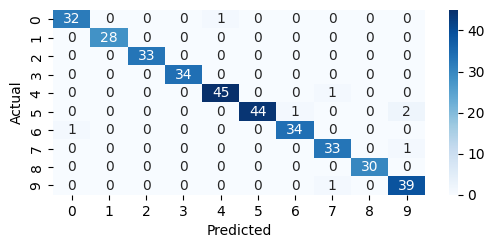

In [3]:
!pip install seaborn

import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to train the model
def train_model():
  try:
    # Load the digits dataset
    digits = load_digits()
    df = pd.DataFrame(digits.data)
    df['target'] = digits.target
    # Split the dataset
    X = df.drop('target', axis='columns')
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=int(estimator_entry.get()))
    model.fit(X_train, y_train)
    # Test accuracy
    accuracy = model.score(X_test, y_test)
    accuracy_label.config(text=f"Model Accuracy: {accuracy:.2f}")
    # Prediction and Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    fig = plt.figure(figsize=(6, 4))
    sn.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    # Clear previous canvas and display the new one
    for widget in canvas_frame.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()
  except Exception as e:
    messagebox.showerror("Error", str(e))
# Set up the GUI window
window = tk.Tk()
window.title("Random Forest Classifier GUI by Faiq Khan")
# Label for number of estimators
estimator_label = tk.Label(window, text="Number of Estimators:")
estimator_label.pack(pady=10)
# Entry for number of estimators
estimator_entry = tk.Entry(window)
estimator_entry.insert(0, "20")  # Default value
estimator_entry.pack(pady=10)

# Train button
train_button = tk.Button(window, text="Train Model", command=train_model)
train_button.pack(pady=20)
# Accuracy label
accuracy_label = tk.Label(window, text="Model Accuracy: N/A")
accuracy_label.pack(pady=10)
# Frame to hold the confusion matrix
canvas_frame = tk.Frame(window)
canvas_frame.pack(pady=20)
# Run the GUI event loop
window.mainloop()


In [8]:
import sklearn
print(sklearn.__version__)


1.5.1


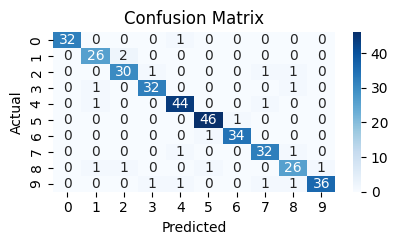

In [2]:
import tkinter as tk
from tkinter import messagebox, ttk
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to train the model
def train_model():
    try:
        # Load the digits dataset
        digits = load_digits()
        df = pd.DataFrame(digits.data)
        df['target'] = digits.target
        X = df.drop('target', axis='columns')
        y = df['target']

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Select the base estimator based on user selection
        base_estimator_name = estimator_combo.get()
        if base_estimator_name == "Decision Tree":
            base_estimator = DecisionTreeClassifier()
        elif base_estimator_name == "Logistic Regression":
            base_estimator = LogisticRegression(max_iter=1000)

        # Get the number of estimators from the entry field
        n_estimators = int(estimator_entry.get())    

        # Create and train the BaggingClassifier (use 'estimator' instead of 'base_estimator')
        model = BaggingClassifier(estimator=base_estimator, n_estimators=n_estimators)
        model.fit(X_train, y_train)

        # Calculate accuracy and update the label
        accuracy = model.score(X_test, y_test)
        accuracy_label.config(text=f"Model Accuracy: {accuracy:.2f}")

        # Make predictions and create a confusion matrix
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix using seaborn
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title("Confusion Matrix")

        # Clear any previous plots and display the new plot in the canvas
        for widget in canvas_frame.winfo_children():
            widget.destroy()    
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except Exception as e:
        messagebox.showerror("Error", str(e))

# Set up the GUI window
window = tk.Tk()
window.title("Bagging Classifier GUI by Faiq Khan")

# Label for selecting the base estimator
estimator_label = tk.Label(window, text="Select Base Estimator:")
estimator_label.pack(pady=10)

# Combobox for base estimator selection
estimator_combo = ttk.Combobox(window, values=["Decision Tree", "Logistic Regression"])
estimator_combo.current(0)  # Default to Decision Tree
estimator_combo.pack(pady=10)

# Label for the number of estimators
estimator_entry_label = tk.Label(window, text="Number of Estimators:")
estimator_entry_label.pack(pady=10)

# Entry box for number of estimators input
estimator_entry = tk.Entry(window)
estimator_entry.insert(0, "10")  # Default value is 10
estimator_entry.pack(pady=10)

# Button to start training the model
train_button = tk.Button(window, text="Train Model", command=train_model)
train_button.pack(pady=20)

# Label to display accuracy
accuracy_label = tk.Label(window, text="Model Accuracy: N/A")
accuracy_label.pack(pady=10)

# Frame to hold the confusion matrix plot
canvas_frame = tk.Frame(window)
canvas_frame.pack(pady=20)

# Run the Tkinter event loop
window.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create the GUI application
def create_gui():
    # Function to train the model and perform Grid Search
    def train_model():
        try:
            # Generate a synthetic regression dataset
            X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Select base estimator from the GUI
            base_estimator_name = base_estimator_combo.get()
            if base_estimator_name == "Decision Tree Regressor":
                base_estimator = DecisionTreeRegressor(random_state=42)
            elif base_estimator_name == "Linear Regressor":
                base_estimator = LinearRegression()

            # Get hyperparameters from the GUI
            n_estimators = int(n_estimators_entry.get())
            max_samples = float(max_samples_entry.get())
            bootstrap = bool(bootstrap_var.get())

            # Define Bagging Regressor with the base estimator (use 'estimator' instead of 'base_estimator')
            bagging_regressor = BaggingRegressor(
                estimator=base_estimator,  # Use 'estimator' here
                n_estimators=n_estimators,
                max_samples=max_samples,
                bootstrap=bootstrap,
                random_state=42
            )

            # Define Grid Search parameters
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_samples': [0.5, 0.7, 1.0],
                'bootstrap': [True, False]
            }

            # Perform Grid Search
            bagging_regressor_grid = GridSearchCV(bagging_regressor, param_grid, cv=5)
            bagging_regressor_grid.fit(X_train, y_train)

            # Best model from Grid Search
            best_model = bagging_regressor_grid.best_estimator_

            # Predict using the best model
            y_pred = best_model.predict(X_test)

            # Calculate Mean Squared Error and R² Scores
            mse = mean_squared_error(y_test, y_pred)
            train_r2 = best_model.score(X_train, y_train)
            test_r2 = best_model.score(X_test, y_test)
            best_r2 = bagging_regressor_grid.best_score_
            best_params = bagging_regressor_grid.best_params_

            # Update result labels with MSE and R² Scores
            result_label.config(text=f"MSE: {mse:.4f}")
            r2_train_label.config(text=f"Train R² Score: {train_r2:.3f}")
            r2_test_label.config(text=f"Test R² Score: {test_r2:.3f}")
            best_r2_label.config(text=f"Best R² Score (Grid Search): {best_r2:.3f}")
            best_params_label.config(text=f"Best Parameters: {best_params}")

        except Exception as e:
            messagebox.showerror("Error", str(e))

    # Create the main window
    window = tk.Tk()
    window.title("Bagging Regressor GUI with Grid Search by Faiq")

    # Base Estimator selection
    base_estimator_label = tk.Label(window, text="Select Base Estimator:")
    base_estimator_label.pack(pady=5)

    base_estimator_combo = ttk.Combobox(window, values=["Decision Tree Regressor", "Linear Regressor"])
    base_estimator_combo.current(0)
    base_estimator_combo.pack(pady=5)

    # Number of Estimators
    n_estimators_label = tk.Label(window, text="Number of Estimators:")
    n_estimators_label.pack(pady=5)

    n_estimators_entry = tk.Entry(window)
    n_estimators_entry.insert(0, "100")
    n_estimators_entry.pack(pady=5)

    # Max Samples
    max_samples_label = tk.Label(window, text="Max Samples (0.0 to 1.0):")
    max_samples_label.pack(pady=5)

    max_samples_entry = tk.Entry(window)
    max_samples_entry.insert(0, "0.5")
    max_samples_entry.pack(pady=5)

    # Bootstrap option
    bootstrap_var = tk.IntVar()
    bootstrap_check = tk.Checkbutton(window, text="Bootstrap", variable=bootstrap_var)
    bootstrap_check.pack(pady=5)

    # Train Model Button
    train_button = tk.Button(window, text="Train Model", command=train_model)
    train_button.pack(pady=10)

    # Label to display results
    result_label = tk.Label(window, text="MSE: N/A")
    result_label.pack(pady=5)

    r2_train_label = tk.Label(window, text="Train R² Score: N/A")
    r2_train_label.pack(pady=5)

    r2_test_label = tk.Label(window, text="Test R² Score: N/A")
    r2_test_label.pack(pady=5)

    best_r2_label = tk.Label(window, text="Best R² Score (Grid Search): N/A")
    best_r2_label.pack(pady=5)

    best_params_label = tk.Label(window, text="Best Parameters: N/A")
    best_params_label.pack(pady=5)

    # Start the main loop
    window.mainloop()

# Run the GUI
create_gui()
